#  Load Mnist dataset.



In [1]:
!pip install python-mnist

  Running setup.py bdist_wheel for python-mnist ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/e3/67/aa/bea4c3dc84f590c0dabb8c00317b6b7f8e6bd43b095d7679d5
Successfully built python-mnist
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST
%matplotlib inline

## Import the dataset

In [3]:
# Load Train and test images and labels in different objects
mndata = MNIST('../../data')
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

There are 55k examples in train, and 10k in eval. You may wish to limit the size to experiment faster. 

In [4]:
# Limit the number of training data by using max_examples.
max_examples = 20000
train_data = np.asarray(train_images[:max_examples], dtype=np.float)
train_labels = np.asarray(train_labels[:max_examples], dtype=np.int32)

test_data = np.asarray(test_images, dtype=np.float)
test_labels = np.asarray(test_labels, dtype=np.int32)



In [5]:
# Display using 0,1 matrix.
def display_matrix(obj,d):
    img = obj[d].reshape(28,28)
    for i in range(28):
        print('')
        for j in range(28):
            if img[i][j] > 0:
                print(1,end="")
            else:
                print(0,end="")

In [6]:
display_matrix(test_data,0)


0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000001111110000000000000000
0000001111111111111111000000
0000001111111111111111000000
0000000000011111111111000000
0000000000000000001111000000
0000000000000000011110000000
0000000000000000011110000000
0000000000000000111100000000
0000000000000000111100000000
0000000000000001111000000000
0000000000000001110000000000
0000000000000011110000000000
0000000000000111100000000000
0000000000001111100000000000
0000000000001111000000000000
0000000000011111000000000000
0000000000011110000000000000
0000000000111110000000000000
0000000000111110000000000000
0000000000111100000000000000
0000000000000000000000000000

In [7]:
# Display using pixel 
def display(data,label,i):
    img = data[i]
    plt.title('Example %d. Label: %d' % (i, label[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

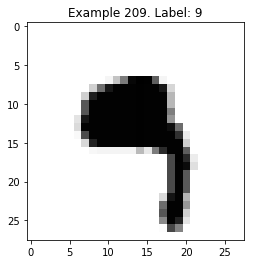

In [33]:
display(test_data,test_labels,209)

In [9]:
# Create a dictionary of the digits (0-9), add each instance of the digit vector in corresponsing 
# value of the digit.
# data = { 0:[[<784 pixels of first instance of 0>],[....]....[]],
#           1:[[<784 pixels of first instance of 1>],[....]....[]],
#              :
#              :
#               9:[[<784 pixels of first instance of 9>],[....]....[]],
#       }

data = {}
for i in range(len(train_labels)):
    key = train_labels[i]
    if key in data:
        data[key].append(train_data[i])
    else:
        data[key]=[train_data[i]]
# Create a dictionary of mean and variance of each of the pixels of the digits ( 0 - 9)   
mean_var_prior = {}
for key in data:
    mean_var_prior[key] = [np.mean(data[key],axis=0)]
    mean_var_prior[key].append(np.std(data[key],axis=0))
    mean_var_prior[key].append(len(data[key])/len(train_labels))
    

In [10]:
# create a function to derive the pdf using mean and variance. 
# Return 1.0 in case of 0.0 mean or standard deviation.
def pdf(x,mean,std):
    ret = 0.0
    if std != 0.0 and mean != 0.0:
        ret =  (np.exp(- ((x - mean)**2 / (2 * std**2)))) / (np.sqrt(2 * np.pi) * std)
    if ret == 0.0:
        return 1.0
    else:
        return ret
    

In [36]:
count = 0
limit = 100
for index in range(limit):
    pro = {}
    num = []
    # Interate over the digits.
    for i in range(10):
        p  = 0
        # Interate over the pixels, pdf values are converted to respective log for ease of comparision
        # the pdf values are between 0 to 1, which is difficult to compare, so it is 
        # scaled into log values.
        for j in range(784):
            p  = p + np.log(pdf(test_data[index][j],mean_var_prior[i][0][j],mean_var_prior[i][1][j]))
        pro[i] = p * mean_var_prior[i][2]
    num = sorted(pro.items(), key=lambda value: value[1])
    print("Test data is :",test_labels[index],end=", ")
    print("Predicted data is :",num[-1][0])
    if test_labels[index] == num[-1][0]:
        count = count + 1
        
print(count/limit)


Test data is : 7, Predicted data is : 9
Test data is : 2, Predicted data is : 2
Test data is : 1, Predicted data is : 1
Test data is : 0, Predicted data is : 0
Test data is : 4, Predicted data is : 5
Test data is : 1, Predicted data is : 1
Test data is : 4, Predicted data is : 5
Test data is : 9, Predicted data is : 9
Test data is : 5, Predicted data is : 5
Test data is : 9, Predicted data is : 9
Test data is : 0, Predicted data is : 0
Test data is : 6, Predicted data is : 6
Test data is : 9, Predicted data is : 9
Test data is : 0, Predicted data is : 5
Test data is : 1, Predicted data is : 1
Test data is : 5, Predicted data is : 5
Test data is : 9, Predicted data is : 9
Test data is : 7, Predicted data is : 7
Test data is : 3, Predicted data is : 2
Test data is : 4, Predicted data is : 5
Test data is : 9, Predicted data is : 5
Test data is : 6, Predicted data is : 6
Test data is : 6, Predicted data is : 6
Test data is : 5, Predicted data is : 5
Test data is : 4, Predicted data is : 5
